# 1. Data Cleansing

In [51]:
import pandas as pd
df = pd.read_csv('C:/Users/piai/Desktop/code_file/dataset_WWW2019/raw_POIs.txt'
,sep = '\t',header=None, encoding= 'utf-8')

In [52]:
df.columns = ['venue_ID', 'latitude', 'longtitude', 'category', 'country_code']
df.head(10)

,venue_ID,latitude,longtitude,category,country_code
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US
3,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US
4,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US
5,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US
6,3fd66200f964a52000ef1ee3,34.188944,-118.320329,Karaoke Bar,US
7,3fd66200f964a52000f01ee3,34.010279,-118.495523,Beer Garden,US
8,3fd66200f964a52000f11ee3,40.652766,-74.003092,Bowling Alley,US
9,3fd66200f964a52001e51ee3,40.726961,-73.980039,Dive Bar,US


In [53]:
len(df)

11180160

In [54]:
# 카테고리는 519개가 존재한다.
df['category'].drop_duplicates().count()

519

In [55]:
df['category'].drop_duplicates()

0                        Post Office
1                          Jazz Club
2                                Gym
3                  Indian Restaurant
5                     Sandwich Place
                      ...           
11179767    Comfort Food Restaurants
11179875                     Bistros
11179895         Country Dance Clubs
11180061              Go Kart Tracks
11180090            Warehouse Stores
Name: category, Length: 519, dtype: object

<AxesSubplot:>

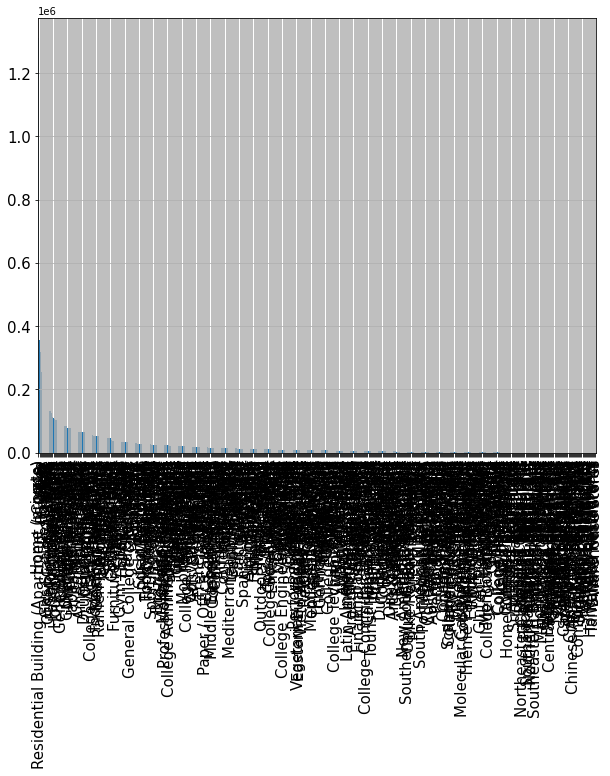

In [56]:
CountStatus = pd.value_counts(df['category'], sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

In [57]:
category_list = df['category'].drop_duplicates().tolist()

In [58]:
category_list

['Post Office',
 'Jazz Club',
 'Gym',
 'Indian Restaurant',
 'Sandwich Place',
 'Karaoke Bar',
 'Beer Garden',
 'Bowling Alley',
 'Dive Bar',
 'Sports Bar',
 'Thai Restaurant',
 'Seafood Restaurant',
 'Bar',
 'Nightclub',
 'Music Venue',
 'Pub',
 'Gastropub',
 'French Restaurant',
 'Hotel Bar',
 'Sushi Restaurant',
 'Theater',
 'Cuban Restaurant',
 'Breakfast Spot',
 'Gay Bar',
 'Music Store',
 'Strip Club',
 'Cocktail Bar',
 'Italian Restaurant',
 'Rock Club',
 'American Restaurant',
 'Mexican Restaurant',
 'Thrift / Vintage Store',
 'Deli / Bodega',
 'Portuguese Restaurant',
 'Dessert Shop',
 'Caf�',
 'Whisky Bar',
 'Asian Restaurant',
 'New American Restaurant',
 'Middle Eastern Restaurant',
 'Lounge',
 'Pizza Place',
 'Steakhouse',
 'Wine Bar',
 'Salad Place',
 "Dentist's Office",
 'Molecular Gastronomy Restaurant',
 'Office',
 'Diner',
 'Record Shop',
 'Malaysian Restaurant',
 'Ice Cream Shop',
 'Grocery Store',
 'Eastern European Restaurant',
 'Restaurant',
 'Vietnamese Restauran

In [59]:
df[df['category'].str.contains('Caf�')]

,venue_ID,latitude,longtitude,category,country_code
55,3fd66200f964a52008e91ee3,40.736827,-73.986909,Caf�,US
110,3fd66200f964a52011eb1ee3,40.721657,-73.987620,Caf�,US
202,3fd66200f964a5201fe51ee3,40.725472,-73.983783,Caf�,US
273,3fd66200f964a5202aeb1ee3,40.758357,-73.970546,Caf�,US
387,3fd66200f964a5203be61ee3,40.720408,-73.996878,Caf��,US
...,...,...,...,...,...
11180022,52e91937498eb0f75aa19629,-6.165530,106.868978,Caf��,ID
11180056,52e91e89498ed44a79058e07,-6.214179,106.781910,Caf��,ID
11180085,52e923ff498e99fdc6d06104,48.134010,10.401271,Caf��,DE
11180093,52e92558498ec89732039d22,35.699969,51.403405,Caf��,IR


In [60]:
# Cafe와 Caffe의 e에 위 첨자가 있는 경우 글자를 인식하지 못하기 때문에 생긴 오류 수정.
df.loc[df['category'].str.contains('Caf�'), 'category'] = 'Cafe'

In [61]:
# 코코레치(음식) 의 마지막 글자 부호가 붙어있는 경우 글자를 인식하지 못하기 때문에 생긴 오류 수정.
df.loc[df['category'].str.contains('Kokore'), 'category'] = 'Kokoretsi Restaurant'

In [62]:
df[df['category'].str.contains('Caf')]

,venue_ID,latitude,longtitude,category,country_code
55,3fd66200f964a52008e91ee3,40.736827,-73.986909,Cafe,US
110,3fd66200f964a52011eb1ee3,40.721657,-73.987620,Cafe,US
202,3fd66200f964a5201fe51ee3,40.725472,-73.983783,Cafe,US
273,3fd66200f964a5202aeb1ee3,40.758357,-73.970546,Cafe,US
387,3fd66200f964a5203be61ee3,40.720408,-73.996878,Cafe,US
...,...,...,...,...,...
11180022,52e91937498eb0f75aa19629,-6.165530,106.868978,Cafe,ID
11180056,52e91e89498ed44a79058e07,-6.214179,106.781910,Cafe,ID
11180085,52e923ff498e99fdc6d06104,48.134010,10.401271,Cafe,DE
11180093,52e92558498ec89732039d22,35.699969,51.403405,Cafe,IR


In [63]:
category_list = df['category'].drop_duplicates().tolist()
with open('category_list.txt', 'w') as f:
    for line in category_list:
        f.write(line)
        f.write('\n')

In [64]:
df1 = df[:]

In [65]:
df1.loc[df1['category'].str.contains('Restaurant'), 'middle_category'] = 'Restaurant'

C:\Users\piai\AppData\Local\Temp\ipykernel_18064\2530714780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['category'].str.contains('Restaurant'), 'middle_category'] = 'Restaurant'


In [66]:
df1

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN
3,3fd66200f964a52000ea1ee3,40.732456,-74.003755,Indian Restaurant,US,Restaurant
4,3fd66200f964a52000ec1ee3,42.345907,-71.087001,Indian Restaurant,US,Restaurant
...,...,...,...,...,...,...
11180155,52e92ec0498e1a09484475c9,55.852631,37.447034,Residential Building (Apartment / Condo),RU,NaN
11180156,52e92f11498e8e25136e9fe2,-4.329570,-40.711533,Dentist's Office,BR,NaN
11180157,52e92f4511d2a77832a49eec,52.505471,13.368507,Financial or Legal Service,DE,NaN
11180158,52e92fa5498ef926067570ff,41.025367,28.554854,City,TR,NaN


In [67]:
df1.loc[df1['category'].str.contains('Barbershop'), 'middle_category'] = 'Salon / Barbershop'

In [68]:
df1[df1['category'].str.contains('Office')]

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
95,3fd66200f964a52010e31ee3,40.716582,-73.957036,Dentist's Office,US,NaN
99,3fd66200f964a52010e81ee3,40.759153,-73.974730,Office,US,NaN
975,3fd66200f964a52094e71ee3,40.754373,-73.986409,Office,US,NaN
1746,40870b00f964a5209bf21ee3,37.421947,-122.083855,Office,US,NaN
...,...,...,...,...,...,...
11180071,52e9208d498ed1b5ac328019,44.829360,11.148551,Dentist's Office,IT,NaN
11180082,52e923c3498ebab3b457f5d6,41.008709,28.895126,Office,TR,NaN
11180126,52e92957498efc7063ecf34d,18.187775,-65.709358,Doctor's Office,PR,NaN
11180134,52e92abd11d23d68e18c8a04,20.629663,-105.227554,Paper / Office Supplies Store,MX,NaN


In [69]:
df2 = pd.read_csv('C:/Users/piai/Desktop/code_file/dataset_WWW2019/raw_Checkins_anonymized.txt'
,sep = '\t',header=None, encoding= 'utf-8')

In [70]:
df2.columns = ['user_ID', 'venue_ID', 'UTC_time', 'Timezone_offset']
df2.head(10)
# 1. User ID (anonymized)
# 2. Venue ID (Foursquare, more information see below in raw_POIs.txt)
# 3. UTC time
# 4. Timezone offset in minutes (The offset in minutes between when this check-sin occurred and the same time in UTC, i.e., UTC time + offset is the local time)

,user_ID,venue_ID,UTC_time,Timezone_offset
0,546830,4f5e3a72e4b053fd6a4313f6,Tue Apr 03 18:00:06 +0000 2012,240.0
1,822121,4b4b87b5f964a5204a9f26e3,Tue Apr 03 18:00:07 +0000 2012,180.0
2,2277773,4a85b1b3f964a520eefe1fe3,Tue Apr 03 18:00:08 +0000 2012,-240.0
3,208842,4b4606f2f964a520751426e3,Tue Apr 03 18:00:08 +0000 2012,-300.0
4,1139878,4d9254ef62ad5481fa6e6a4b,Tue Apr 03 18:00:08 +0000 2012,-180.0
5,185939,4c2b4e8a9a559c74832f0de2,Tue Apr 03 18:00:09 +0000 2012,240.0
6,113817,4b4bade2f964a520cfa326e3,Tue Apr 03 18:00:09 +0000 2012,-240.0
7,1565673,49bbd6c0f964a520f4531fe3,Tue Apr 03 18:00:09 +0000 2012,-240.0
8,14732,4c143cada5eb76b0dc7dc1b7,Tue Apr 03 18:00:09 +0000 2012,-240.0
9,1397630,4e88cf4ed22d53877981fdab,Tue Apr 03 18:00:09 +0000 2012,-300.0


In [71]:
df2[df2['user_ID'] == 546830]

,user_ID,venue_ID,UTC_time,Timezone_offset
0,546830,4f5e3a72e4b053fd6a4313f6,Tue Apr 03 18:00:06 +0000 2012,240.0
143646,546830,4c6a53d5897b1b8d947ab117,Wed Apr 04 06:08:34 +0000 2012,240.0
173710,546830,4d54f9a4ba5b224b5c1b0914,Wed Apr 04 09:19:57 +0000 2012,240.0
262969,546830,4f133173e4b07e9ecc36ff35,Wed Apr 04 14:19:21 +0000 2012,240.0
372431,546830,4f7ac783e4b03318f5e7890f,Thu Apr 05 08:11:25 +0000 2012,240.0
...,...,...,...,...
24739566,546830,501e9e7be4b07ccc38fa4699,Sun Aug 05 16:25:48 +0000 2012,240.0
25224999,546830,4e734d94a8095a7c4238954b,Fri Aug 10 10:57:55 +0000 2012,240.0
25247541,546830,4b645287f964a52095aa2ae3,Fri Aug 10 12:21:30 +0000 2012,240.0
26723288,546830,4b645287f964a52095aa2ae3,Mon Aug 20 11:46:01 +0000 2012,240.0


In [72]:
df2[df2['user_ID'] == 822121]

,user_ID,venue_ID,UTC_time,Timezone_offset
1,822121,4b4b87b5f964a5204a9f26e3,Tue Apr 03 18:00:07 +0000 2012,180.0
169121,822121,4cbbf7dabac93704ee50f57c,Wed Apr 04 08:19:46 +0000 2012,180.0
305925,822121,4c681902e75ac9280bc0fbda,Wed Apr 04 17:06:55 +0000 2012,180.0
853799,822121,4b684c69f964a5204f702be3,Sun Apr 08 12:46:46 +0000 2012,180.0
867962,822121,4e5638e9a809ca773dfd07f0,Sun Apr 08 13:43:05 +0000 2012,180.0
1355242,822121,4f7773950cd67590e0ef75bc,Tue Apr 10 17:16:55 +0000 2012,180.0
1778658,822121,4d888a1499c2a1cdda6868d7,Thu Apr 12 07:22:32 +0000 2012,180.0
2572190,822121,4b7f076bf964a520681130e3,Sat Apr 14 19:04:38 +0000 2012,180.0
3001210,822121,4cbbf7dabac93704ee50f57c,Mon Apr 16 13:00:29 +0000 2012,180.0
3034026,822121,4e0dd32d45ddc2c6d1711f4c,Mon Apr 16 14:52:01 +0000 2012,180.0


In [73]:
df2[df2['user_ID'] == 1565673].head(20)

,user_ID,venue_ID,UTC_time,Timezone_offset
7,1565673,49bbd6c0f964a520f4531fe3,Tue Apr 03 18:00:09 +0000 2012,-240.0
66641,1565673,4e08ad8cd4c03ae0b9d11f93,Tue Apr 03 23:36:34 +0000 2012,-240.0
68967,1565673,4be09b7fcb81c9b62069668b,Tue Apr 03 23:46:46 +0000 2012,-240.0
69082,1565673,49f50c9ff964a5208a6b1fe3,Tue Apr 03 23:47:16 +0000 2012,-240.0
69210,1565673,4a6a09b1f964a52071cc1fe3,Tue Apr 03 23:47:49 +0000 2012,-240.0
69324,1565673,49e63b62f964a52027641fe3,Tue Apr 03 23:48:15 +0000 2012,-240.0
69457,1565673,45795395f964a520d23e1fe3,Tue Apr 03 23:48:51 +0000 2012,-240.0
70090,1565673,4c9d89017ada199cf0a493bc,Tue Apr 03 23:51:33 +0000 2012,-240.0
70185,1565673,4b5b92def964a5201d0829e3,Tue Apr 03 23:52:01 +0000 2012,-240.0
70270,1565673,4baea553f964a5206dca3be3,Tue Apr 03 23:52:25 +0000 2012,-240.0


In [74]:
df3 = df1.merge(df2)

In [75]:
df3.head(10)

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
0,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,35174,Tue Apr 03 22:23:27 +0000 2012,-240.0
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,1547074,Tue Apr 03 23:58:22 +0000 2012,-240.0
2,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,224351,Wed Apr 04 05:37:02 +0000 2012,-240.0
3,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,2326,Thu Apr 12 23:35:06 +0000 2012,-240.0
4,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,1035570,Sat Apr 14 03:25:31 +0000 2012,-240.0
5,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,75807,Sat Apr 14 22:52:53 +0000 2012,-240.0
6,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,262577,Sat Apr 14 23:27:41 +0000 2012,-240.0
7,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,1547074,Wed Apr 18 01:13:35 +0000 2012,-240.0
8,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,319185,Fri Apr 20 01:46:59 +0000 2012,-240.0
9,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN,1547074,Sat Apr 21 00:05:32 +0000 2012,-240.0


In [76]:
df3[df3['country_code'] == 'KR']

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
1452520,4b058781f964a520659622e3,37.555686,127.005097,Hotel,KR,NaN,1212365,Sun Apr 08 08:18:15 +0000 2012,540.0
1452521,4b058781f964a520659622e3,37.555686,127.005097,Hotel,KR,NaN,1515120,Sun Apr 08 08:36:42 +0000 2012,540.0
1452522,4b058781f964a520659622e3,37.555686,127.005097,Hotel,KR,NaN,1499329,Tue Apr 10 07:33:35 +0000 2012,540.0
1452523,4b058781f964a520659622e3,37.555686,127.005097,Hotel,KR,NaN,403731,Wed Apr 11 05:51:03 +0000 2012,540.0
1452524,4b058781f964a520659622e3,37.555686,127.005097,Hotel,KR,NaN,963263,Wed Apr 11 15:44:46 +0000 2012,540.0
...,...,...,...,...,...,...,...,...,...
26768438,5089487ae4b069fe56e30169,37.449389,126.726008,Design Studio,KR,NaN,1076129,Sat Jul 07 02:49:30 +0000 2012,540.0
26768439,5089487ae4b069fe56e30169,37.449389,126.726008,Design Studio,KR,NaN,1076129,Wed Jul 11 22:26:32 +0000 2012,540.0
26768440,5089487ae4b069fe56e30169,37.449389,126.726008,Design Studio,KR,NaN,1076129,Wed Jul 11 22:44:58 +0000 2012,540.0
26768441,5089487ae4b069fe56e30169,37.449389,126.726008,Design Studio,KR,NaN,1076129,Wed Jul 11 23:01:57 +0000 2012,540.0


# 해야할 것
    1) 인덱스가 UTC_time 기준으로 형성돼있지 않다. UTC_time 쪼개서 날짜, 시간별로 컬럼 정렬해 확인해야 함. -> 일자별 카테고리 시퀀스가 충분히 만들어지는지 확인을 해야하므로.
    2) 카테고리 대범주 형성해야 함.

In [77]:
df3[df3['user_ID'] == 1212365].sort_values('UTC_time').head(20)
# 아래 예시에서, 네번째 베이커리를 새벽에 왜 가나 했다. 좌표 찍어보니 메리어트 호텔로 나옴. 카테고리에 부정확성이 있는 것 같다.

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
8858192,4bf6648f5e800f478f36e7d4,37.523954,127.023384,Pub,KR,NaN,1212365,Fri Jun 01 09:09:50 +0000 2012,540.0
5632847,4b94d34df964a520698434e3,37.517377,127.034783,Chinese Restaurant,KR,Restaurant,1212365,Fri Jun 01 12:44:04 +0000 2012,540.0
6633590,4bb28e2514cfd13a5a1f15ab,37.216059,127.336164,Golf Course,KR,NaN,1212365,Fri Jun 08 20:10:09 +0000 2012,540.0
7587633,4bce58c8b6c49c74801d9791,37.521161,126.918228,Bakery,KR,NaN,1212365,Fri May 04 02:28:23 +0000 2012,540.0
4822705,4b7948bcf964a5202df22ee3,37.495201,127.037211,Korean Restaurant,KR,Restaurant,1212365,Fri May 04 10:37:26 +0000 2012,540.0
5424056,4b8d27c2f964a520aeea32e3,37.478872,127.042107,Pub,KR,NaN,1212365,Fri May 04 12:09:56 +0000 2012,540.0
25285946,4fa4b11de4b01acec35e953b,37.498112,127.058510,Korean Restaurant,KR,Restaurant,1212365,Fri May 11 09:29:38 +0000 2012,540.0
12055040,4c874fa551ada1cd7ecd4610,37.593817,127.052610,College Quad,KR,NaN,1212365,Fri May 11 11:58:47 +0000 2012,540.0
6558805,4bb01f3cf964a52060383ce3,37.563097,126.992051,Korean Restaurant,KR,Restaurant,1212365,Fri May 25 11:42:45 +0000 2012,540.0
5763822,4b9a19f3f964a520d79e35e3,37.520559,127.035931,Korean Restaurant,KR,Restaurant,1212365,Mon Apr 09 11:53:29 +0000 2012,540.0


In [78]:
# Cafe와 Caffe의 e에 위 첨자가 있는 경우 글자를 인식하지 못하기 때문에 생긴 오류 수정.
df.loc[df['category'].str.contains('Caf�'), 'category'] = 'Cafe'

In [79]:
df1.loc[df1['category'].str.contains('Restaurant'), 'middle_category'] = 'Restaurant'

In [80]:
df1[df1['middle_category'].isnull()].head(10)

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN
5,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US,NaN
6,3fd66200f964a52000ef1ee3,34.188944,-118.320329,Karaoke Bar,US,NaN
7,3fd66200f964a52000f01ee3,34.010279,-118.495523,Beer Garden,US,NaN
8,3fd66200f964a52000f11ee3,40.652766,-74.003092,Bowling Alley,US,NaN
9,3fd66200f964a52001e51ee3,40.726961,-73.980039,Dive Bar,US,NaN
10,3fd66200f964a52001e81ee3,40.756377,-73.967653,Sports Bar,US,NaN
13,3fd66200f964a52001ef1ee3,34.092793,-118.281469,Bar,US,NaN


In [81]:
df1[df1['category'].str.contains('Club')]

,venue_ID,latitude,longtitude,category,country_code,middle_category
1,3fd66200f964a52000e71ee3,40.733596,-74.003139,Jazz Club,US,NaN
37,3fd66200f964a52005f11ee3,40.713996,-73.932816,Strip Club,US,NaN
45,3fd66200f964a52006f01ee3,34.010052,-118.496561,Rock Club,US,NaN
80,3fd66200f964a5200deb1ee3,40.720933,-73.987901,Rock Club,US,NaN
89,3fd66200f964a5200fe41ee3,40.721100,-73.987924,Rock Club,US,NaN
...,...,...,...,...,...,...
11179055,52e7a243498ef87c1ab039d9,50.437881,30.438625,Comedy Club,UA,NaN
11179056,52e7a25b498e128b11b1e30f,36.784347,34.589877,Comedy Club,TR,NaN
11179408,52e82c47498eaf9b3b30f58e,36.894321,30.693535,Comedy Club,TR,NaN
11179895,52e90247498e13e0bca54c88,55.890688,37.034629,Country Dance Clubs,RU,NaN


In [82]:
df.loc[df['category'].str.contains('Club'), 'category'] = 'Cafe'
df1.loc[df1['category'].str.contains('Club'), 'middle_category'] = 'Entertain'

In [83]:
df1[df1['middle_category'].isnull()].head(10)

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN
5,3fd66200f964a52000ee1ee3,39.933178,-75.159262,Sandwich Place,US,NaN
6,3fd66200f964a52000ef1ee3,34.188944,-118.320329,Karaoke Bar,US,NaN
7,3fd66200f964a52000f01ee3,34.010279,-118.495523,Beer Garden,US,NaN
8,3fd66200f964a52000f11ee3,40.652766,-74.003092,Bowling Alley,US,NaN
9,3fd66200f964a52001e51ee3,40.726961,-73.980039,Dive Bar,US,NaN
10,3fd66200f964a52001e81ee3,40.756377,-73.967653,Sports Bar,US,NaN
13,3fd66200f964a52001ef1ee3,34.092793,-118.281469,Bar,US,NaN
14,3fd66200f964a52001f01ee3,34.010366,-118.493357,Bar,US,NaN


In [84]:
df1[df1['category'].str.contains('Gym')]

,venue_ID,latitude,longtitude,category,country_code,middle_category
2,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN
497,3fd66200f964a5204ae41ee3,40.734758,-73.992803,Gym,US,NaN
749,3fd66200f964a5206fe71ee3,40.752930,-73.974725,Gym,US,NaN
1680,4043ce80f964a52026f21ee3,25.784754,-80.130676,Gym / Fitness Center,US,NaN
1774,408c5100f964a520c8f21ee3,37.760641,-122.412518,Climbing Gym,US,NaN
...,...,...,...,...,...,...
11179383,52e826e0498e2143f411a5c1,19.317873,-99.078486,Gym,MX,NaN
11179612,52e8d8b0498eba20fecc0433,47.760439,28.988864,Gym,MD,NaN
11179859,52e8fced498e9748e838904c,11.911205,79.752748,Gym,IN,NaN
11179866,52e8fd7a498ecd56f99f4b88,54.368809,86.203331,Gym,RU,NaN


In [85]:
df3[df3['category'].str.contains('Gym')]

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
65,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN,872051,Thu Apr 19 23:12:46 +0000 2012,-240.0
66,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN,383648,Wed Apr 25 00:19:05 +0000 2012,-240.0
67,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN,383648,Thu Jun 07 22:32:19 +0000 2012,-240.0
68,3fd66200f964a52000e81ee3,40.758102,-73.975734,Gym,US,NaN,383648,Tue Aug 14 20:13:39 +0000 2012,-240.0
11096,3fd66200f964a5204ae41ee3,40.734758,-73.992803,Gym,US,NaN,18013,Tue Apr 03 22:42:28 +0000 2012,-240.0
...,...,...,...,...,...,...,...,...,...
26762231,505b8b554c7fd4d07eae0270,43.404317,-80.502038,Gym / Fitness Center,CA,NaN,77939,Wed Jul 18 00:49:31 +0000 2012,-240.0
26762232,505b8b554c7fd4d07eae0270,43.404317,-80.502038,Gym / Fitness Center,CA,NaN,77939,Tue Jul 24 13:11:01 +0000 2012,-240.0
26762300,505bcc8be0e20c4daf4c6d4d,34.105586,-117.904415,Gym,US,NaN,193519,Sat Aug 11 06:47:42 +0000 2012,-420.0
26762301,505bcc8be0e20c4daf4c6d4d,34.105586,-117.904415,Gym,US,NaN,193519,Mon Aug 13 05:31:30 +0000 2012,-420.0


In [86]:
df1[df1['category'].str.contains('Bar') | df1['category'].str.contains('Pub')]

,venue_ID,latitude,longtitude,category,country_code,middle_category
6,3fd66200f964a52000ef1ee3,34.188944,-118.320329,Karaoke Bar,US,NaN
9,3fd66200f964a52001e51ee3,40.726961,-73.980039,Dive Bar,US,NaN
10,3fd66200f964a52001e81ee3,40.756377,-73.967653,Sports Bar,US,NaN
13,3fd66200f964a52001ef1ee3,34.092793,-118.281469,Bar,US,NaN
14,3fd66200f964a52001f01ee3,34.010366,-118.493357,Bar,US,NaN
...,...,...,...,...,...,...
11179897,52e9028611d248b2a424e822,36.593662,36.163986,Public Art,TR,NaN
11179915,52e90547498e10f11259d76a,38.921413,27.841921,Salon / Barbershop,TR,Salon / Barbershop
11179927,52e907b4498ea193ccde2faa,4.621179,101.136912,Salon / Barbershop,MY,Salon / Barbershop
11180087,52e9244e498e7cf0f2565f5b,41.027427,29.043217,Pub,TR,NaN


In [87]:
df1[df1['category'].str.contains('Office')].head(30)

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
95,3fd66200f964a52010e31ee3,40.716582,-73.957036,Dentist's Office,US,NaN
99,3fd66200f964a52010e81ee3,40.759153,-73.974730,Office,US,NaN
975,3fd66200f964a52094e71ee3,40.754373,-73.986409,Office,US,NaN
1746,40870b00f964a5209bf21ee3,37.421947,-122.083855,Office,US,NaN
1802,40a2ba80f964a52003f31ee3,37.793779,-122.396980,Office,US,NaN
2682,40b28c80f964a520b3fb1ee3,41.903911,-87.629101,Office,US,NaN
2895,40b52f80f964a52050001fe3,38.903647,-77.025998,Office,US,NaN
2897,40b52f80f964a52052001fe3,47.643417,-122.122650,Office,US,NaN
2911,40b52f80f964a52069001fe3,47.592617,-122.316163,Office,US,NaN


In [88]:
df3[df3['category'].str.contains('Dentist\'s Office')]

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
492989,4a3bcd16f964a520c7a01fe3,37.788200,-122.407351,Dentist's Office,US,NaN,53859,Wed Apr 04 15:04:50 +0000 2012,-420.0
506455,4a43fd2ff964a52003a71fe3,44.960187,-93.294049,Dentist's Office,US,NaN,441509,Fri May 04 13:49:51 +0000 2012,-300.0
537193,4a5629a9f964a52099b41fe3,47.575516,-122.309484,Dentist's Office,US,NaN,346436,Wed Jun 13 21:22:23 +0000 2012,-420.0
537194,4a5629a9f964a52099b41fe3,47.575516,-122.309484,Dentist's Office,US,NaN,74249,Thu Aug 16 16:03:08 +0000 2012,-420.0
589765,4a68e255f964a52032cb1fe3,37.794731,-122.398304,Dentist's Office,US,NaN,10086,Thu Jul 05 16:52:41 +0000 2012,-420.0
...,...,...,...,...,...,...,...,...,...
26759052,50321a32e4b0f9a2dea25eae,51.805125,55.158470,Dentist's Office,RU,NaN,778942,Mon Aug 20 11:06:52 +0000 2012,360.0
26759324,50322441e4b003c0edd862c4,46.167571,8.798714,Dentist's Office,CH,NaN,688593,Mon Aug 20 11:49:49 +0000 2012,120.0
26759600,50323048e4b021f7a658ede9,52.760074,87.848740,Dentist's Office,RU,NaN,598753,Mon Aug 20 12:41:35 +0000 2012,420.0
26765948,506b70c3e4b0d23ed0ec6e3a,17.991453,-92.920563,Dentist's Office,MX,NaN,1046378,Tue Jun 26 22:59:05 +0000 2012,-300.0


# 논의드릴 내용은 여기부터

# 2. 두 개 이상의 POI로 시퀀스가 형성된 유저 POI 시퀀스 확인해보기

In [89]:
df3[df3['user_ID'] == 1212365].sort_values('UTC_time').head(30)
# 일하고 운동하러 갔다가 BBQ 식사, 밥 먹고 술마시러 pub에 들리는 모습 등을 볼 수 있다.

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
8858192,4bf6648f5e800f478f36e7d4,37.523954,127.023384,Pub,KR,NaN,1212365,Fri Jun 01 09:09:50 +0000 2012,540.0
5632847,4b94d34df964a520698434e3,37.517377,127.034783,Chinese Restaurant,KR,Restaurant,1212365,Fri Jun 01 12:44:04 +0000 2012,540.0
6633590,4bb28e2514cfd13a5a1f15ab,37.216059,127.336164,Golf Course,KR,NaN,1212365,Fri Jun 08 20:10:09 +0000 2012,540.0
7587633,4bce58c8b6c49c74801d9791,37.521161,126.918228,Bakery,KR,NaN,1212365,Fri May 04 02:28:23 +0000 2012,540.0
4822705,4b7948bcf964a5202df22ee3,37.495201,127.037211,Korean Restaurant,KR,Restaurant,1212365,Fri May 04 10:37:26 +0000 2012,540.0
5424056,4b8d27c2f964a520aeea32e3,37.478872,127.042107,Pub,KR,NaN,1212365,Fri May 04 12:09:56 +0000 2012,540.0
25285946,4fa4b11de4b01acec35e953b,37.498112,127.058510,Korean Restaurant,KR,Restaurant,1212365,Fri May 11 09:29:38 +0000 2012,540.0
12055040,4c874fa551ada1cd7ecd4610,37.593817,127.052610,College Quad,KR,NaN,1212365,Fri May 11 11:58:47 +0000 2012,540.0
6558805,4bb01f3cf964a52060383ce3,37.563097,126.992051,Korean Restaurant,KR,Restaurant,1212365,Fri May 25 11:42:45 +0000 2012,540.0
5763822,4b9a19f3f964a520d79e35e3,37.520559,127.035931,Korean Restaurant,KR,Restaurant,1212365,Mon Apr 09 11:53:29 +0000 2012,540.0


In [90]:
df3[df3['user_ID'] == 1046378].sort_values('UTC_time').head(30)
# 해당 유저는 술집을 가면 n차를 가고, 쇼핑을 하면 이어서 가기도 하는 패턴을 보였다.
# 장보고 영화보거나, 밥먹고 공원 가는 등.. 

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
10902017,4c4b48c9712ac928aebeb06c,17.996866,-92.922782,Hospital,MX,NaN,1046378,Fri Aug 17 16:03:35 +0000 2012,-300.0
20239236,4e8e60e930f8fd4d5234d689,18.020582,-92.892634,Home (private),MX,NaN,1046378,Fri Jul 13 19:22:26 +0000 2012,-300.0
20239226,4e8e60e930f8fd4d5234d689,18.020582,-92.892634,Home (private),MX,NaN,1046378,Fri May 11 06:45:55 +0000 2012,-300.0
5439108,4b8dc0abf964a520150c33e3,17.971671,-92.947919,University,MX,NaN,1046378,Fri May 18 13:28:48 +0000 2012,-300.0
14136111,4d0cd72e7d28721e3e46f520,17.986010,-92.944901,Mexican Restaurant,MX,Restaurant,1046378,Fri May 18 14:42:58 +0000 2012,-300.0
15012987,4d4b0a819544a093508e38e7,18.013441,-92.919412,Bank,MX,NaN,1046378,Mon Jul 02 17:22:01 +0000 2012,-300.0
23465942,4f593bc0e4b03a9f69bfa71d,18.007563,-92.939425,Building,MX,NaN,1046378,Mon Jul 02 19:38:30 +0000 2012,-300.0
18907560,4e447f0ea809d4ed1bbde24d,18.003908,-92.940630,Residential Building (Apartment / Condo),MX,NaN,1046378,Mon Jul 02 20:56:40 +0000 2012,-300.0
4425211,4b6e0ac4f964a520c6a52ce3,18.014977,-92.919574,Multiplex,MX,NaN,1046378,Mon Jul 09 02:36:47 +0000 2012,-300.0
15012979,4d4b0a819544a093508e38e7,18.013441,-92.919412,Bank,MX,NaN,1046378,Mon May 07 16:28:14 +0000 2012,-300.0


In [91]:
# 이 유저는 뚜렷한 패턴을 보이지는 않는 듯 하다.
df3[df3['user_ID'] == 53859].sort_values('UTC_time').head(30)

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
11466722,4c6780d28e9120a16e29db64,37.806213,-122.416288,Sports Bar,US,NaN,53859,Fri Apr 13 03:30:59 +0000 2012,-420.0
1312596,4afb9249f964a520a91e22e3,37.751219,-122.433694,Post Office,US,NaN,53859,Fri Apr 13 22:03:19 +0000 2012,-420.0
97531,412e7980f964a520150d1fe3,37.751657,-122.428274,Pub,US,NaN,53859,Fri Apr 20 02:05:34 +0000 2012,-420.0
7202520,4bc38e68abf49521beedc393,37.763979,-122.433565,Burger Joint,US,NaN,53859,Fri Apr 20 20:25:03 +0000 2012,-420.0
20780,3fd66200f964a5209eec1ee3,37.738956,-122.417178,American Restaurant,US,Restaurant,53859,Fri Jul 06 20:01:58 +0000 2012,-420.0
822454,4ab5166cf964a520617220e3,37.751592,-122.429239,Bagel Shop,US,NaN,53859,Fri Jun 08 15:43:24 +0000 2012,-420.0
846199,4abd43f4f964a5204f8920e3,37.751889,-122.430868,Grocery Store,US,NaN,53859,Fri May 11 19:50:35 +0000 2012,-420.0
11194605,4c59cf862091a593ded45dd0,37.752866,-122.438637,Sandwich Place,US,NaN,53859,Fri May 18 20:01:38 +0000 2012,-420.0
667265,4a8324fbf964a52031fa1fe3,37.789646,-122.401986,Office,US,NaN,53859,Mon Apr 23 15:49:52 +0000 2012,-420.0
645552,4a7b1f0bf964a52013ea1fe3,37.788984,-122.402219,Bakery,US,NaN,53859,Mon Apr 23 19:49:15 +0000 2012,-420.0


In [92]:
# 이 사용자는 한 번 마시면 거의 3차 이상 가는걸 볼 수 있다.
df3[df3['user_ID'] == 383648].sort_values('UTC_time').head(20)

,venue_ID,latitude,longtitude,category,country_code,middle_category,user_ID,UTC_time,Timezone_offset
454498,4a2093b8f964a520a27c1fe3,40.728849,-74.000412,Bar,US,NaN,383648,Fri Apr 13 21:21:16 +0000 2012,-240.0
246977,45142c75f964a520dc391fe3,40.720543,-73.989594,Pub,US,NaN,383648,Fri Apr 13 22:02:40 +0000 2012,-240.0
39967,40a2ba80f964a5200ff31ee3,40.720172,-73.988252,Dive Bar,US,NaN,383648,Fri Apr 13 23:43:38 +0000 2012,-240.0
867624,4ac42cc1f964a520679e20e3,40.743725,-73.920692,Pub,US,NaN,383648,Fri Jul 13 01:36:51 +0000 2012,-240.0
439248,4a106336f964a520b4761fe3,38.891212,-77.029948,History Museum,US,NaN,383648,Fri Jul 20 13:51:50 +0000 2012,-240.0
2971127,4b510930f964a520d43e27e3,40.868688,-73.425886,Mexican Restaurant,US,Restaurant,383648,Fri May 11 19:56:25 +0000 2012,-240.0
8935612,4bf84730c07c9c7420d0bbef,40.730641,-73.984251,Beer Garden,US,NaN,383648,Fri May 18 22:16:17 +0000 2012,-240.0
11151387,4c576a2bb7a31b8d475450da,40.727884,-73.985095,Bar,US,NaN,383648,Fri May 18 23:34:48 +0000 2012,-240.0
1348934,4b023ca0f964a5203e4822e3,40.744003,-73.923618,Mexican Restaurant,US,Restaurant,383648,Fri May 25 19:29:44 +0000 2012,-240.0
14514,3fd66200f964a52065eb1ee3,40.719434,-73.955927,Pub,US,NaN,383648,Fri May 25 22:26:23 +0000 2012,-240.0


# 3. 카테고리 중분류 작업

In [93]:
# 식사(Food) 카테고리 채우기
df1.loc[(df1['category'].str.contains('Sandwich Place')
| df1['category'].str.contains('') | df1['category'].str.contains('Breakfast Spot')
| df1['category'].str.contains('Burger Joint')| df1['category'].str.contains('Pizza Place')
| df1['category'].str.contains('Salad Place')| df1['category'].str.contains('Steakhouse')
| df1['category'].str.contains('Diner')| df1['category'].str.contains('BBQ Joint')
| df1['category'].str.contains('Hot Dog Joint')| df1['category'].str.contains('Ramen')
| df1['category'].str.contains('Burrito')| df1['category'].str.contains('Bagel')
| df1['category'].str.contains('Taco Place')| df1['category'].str.contains('Food Truck')
| df1['category'].str.contains('Fish & Chips Shop')| df1['category'].str.contains('Wings Joint')
), 'middle_category'] = 'Food'
df1.loc[df1['category'].str.contains('Restaurant'), 'middle_category'] = 'Food'

In [94]:
# 카페, 디저트 카테고리 채우기(카페랑 같이 묶을 것인가 고민)
df1.loc[(df1['category'].str.contains('Dessert Shop')
| df1['category'].str.contains('Ice Cream Shop') | df1['category'].str.contains('Donut Shop')
| df1['category'].str.contains('Cafe') | df1['category'].str.contains('Donut Shop')
| df1['category'].str.contains('Cupcake Shop') | df1['category'].str.contains('Coffee')
| df1['category'].str.contains('Tea Room')
), 'middle_category'] = 'Desert / Cafe'

In [95]:
# 유흥(엔터테인먼트) 카테고리 채우기
df1.loc[df1['category'].str.contains('Club'), 'middle_category'] = 'Entertain'
df1.loc[df1['category'].str.contains('Club'), 'middle_category'] = 'Entertain'
df1.loc[(df1['category'].str.contains('Theater') | df1['category'].str.contains('Music Venue')
| df1['category'].str.contains('Nightclub') | df1['category'].str.contains('Bowling Alley')
| df1['category'].str.contains('Club') | df1['category'].str.contains('Art Gallery')
| df1['category'].str.contains('Concert Hall') | df1['category'].str.contains('Performing Arts Venue')
| df1['category'].str.contains('Art Gallery') | df1['category'].str.contains('Event Space')
), 'middle_category'] = 'Entertainment'

In [96]:
# 술 카테고리 채우기
df1.loc[(df1['category'].str.contains('Bar') | df1['category'].str.contains('Pub')
| df1['category'].str.contains('pub') | df1['category'].str.contains('Beer Garden')
| df1['category'].str.contains('Brewery') | df1['category'].str.contains('Beer Garden')
| df1['category'].str.contains('Speakeasy')
), 'middle_category'] = 'Liquid'

In [97]:
# 소매점, 식료품점, 마트 등 Retail 카테고리로 묶기
df1.loc[(df1['category'].str.contains('Deli / Bodega')
| df1['category'].str.contains('Grocery Store') | df1['category'].str.contains('Bakery')
| df1['category'].str.contains('Convenience Store')
), 'middle_category'] = 'Retail'

In [98]:
# 운동 Excercise 카테고리로 묶기
df1.loc[(df1['category'].str.contains('Gym')
), 'middle_category'] = 'Excercise'

In [99]:
# 쇼핑 Shopping 카테고리로 묶기
df1.loc[(df1['category'].str.contains('Thrift / Vintage Store')
| df1['category'].str.contains('Shoe Store') | df1['category'].str.contains('Boutique')
| df1['category'].str.contains('Clothing Store') | df1['category'].str.contains('Bookstore')
| df1['category'].str.contains('Music Store') | df1['category'].str.contains('Bookstore')
| df1['category'].str.contains('Hobby Shop') | df1['category'].str.contains('Record Shop')
| df1['category'].str.contains('Clothing Store') | df1['category'].str.contains('Women\'s Store')
| df1['category'].str.contains('Electronics Store') | df1['category'].str.contains('Hardware Store')
| df1['category'].str.contains('Furniture / Home Store') | df1['category'].str.contains('Wine Shop')
| df1['category'].str.contains('Bike Shop') | df1['category'].str.contains('Jewelry Store')
| df1['category'].str.contains('Gourmet Shop') | df1['category'].str.contains('Plaza')
| df1['category'].str.contains('Arcade')
), 'middle_category'] = 'Shopping'

In [100]:
| df1['category'].str.contains('') | df1['category'].str.contains('')

SyntaxError: invalid syntax (2189565169.py, line 1)

In [ ]:
# 취미 카테고리로 묶기
df1.loc[(df1['category'].str.contains('Tattoo Parlor')| df1['category'].str.contains('Lounge')
| df1['category'].str.contains('Arts & Crafts Store') | df1['category'].str.contains('Event Space')
| df1['category'].str.contains('Pool Hall') | df1['category'].str.contains('')
), 'middle_category'] = 'Shopping'

In [ ]:
# 밤문화 Nightlife 카테고리로 묶기
# Other Nightlife 
| df1['category'].str.contains('') | df1['category'].str.contains('')

In [ ]:
# 숙소 Residential 카테고리로 묶기
df1.loc[(df1['category'].str.contains('Hotel')
), 'middle_category'] = 'Hotel'

df1.loc[(df1['category'].str.contains('Residential')
), 'middle_category'] = 'Residential'

In [ ]:
df1[df1['middle_category'].isnull()].head(30)

,venue_ID,latitude,longtitude,category,country_code,middle_category
0,3fd66200f964a52000e61ee3,40.729209,-73.998753,Post Office,US,NaN
95,3fd66200f964a52010e31ee3,40.716582,-73.957036,Dentist's Office,US,NaN
99,3fd66200f964a52010e81ee3,40.759153,-73.974730,Office,US,NaN
411,3fd66200f964a5203ee71ee3,40.731081,-74.002805,Cheese Shop,US,NaN
631,3fd66200f964a5205ee81ee3,40.798247,-73.961133,Hostel,US,NaN
777,3fd66200f964a52073ee1ee3,34.098709,-118.332300,Pool Hall,US,NaN
863,3fd66200f964a52081e51ee3,40.738893,-73.980785,Other Nightlife,US,NaN
972,3fd66200f964a52094e31ee3,40.716526,-73.995581,Bus Station,US,NaN
975,3fd66200f964a52094e71ee3,40.754373,-73.986409,Office,US,NaN
986,3fd66200f964a52096eb1ee3,40.745548,-73.947236,Art Museum,US,NaN


## 문제 요소
    위에서 분석한 Foursquare 데이터셋은 여행 중 POI를 기록한 것이 아님(일상 생활 기록 등도 포함한 SNS라서). 또한 POI를 방문하는 것마다 기록하는 것은 아니기에, 시퀀스 예측을 하기에 중간에 생략된 장소가 많을 것.
    이에 대한 방안으로,
    1) POI 간 방문 시간 텀이 짧은 경우에 한해서만 시퀀스라 여기고 분석할지
    2) 하루 POI 기록이 6번 이상 등 POI 이동 시마다 SNS에 체크인 인증을 하는 매니아층의 경우만 추려서 분석할지
    3) 그냥 이러한 요소 생각 안하고 할지(지역상권 또한 전에 어떤 곳들을 방문하고 온건지 알 수 없고, 캡티브 포털이 포착하지 못한 상권 인근 POI를 들렸다 와도 모르기 때문에)

## 생각 정리

    추후 captive portal등에서 추가고려 될 수 있는 사용자 정보: 구매수량, 구매금액 등의 정보 -> 몇 명인지 추정이 가능, 관련해 층화된 고객군의 특징 별로 추천이 달라질 것이라 예상.

    카테고리를 레이블링 하고 나면, 알고리즘은(기존의 다양한 알고리즘을 활용하겠지만)

    1) t시점의 카테고리를 인풋 -> t+1 시점의 카테고리를 output으로 할지 (captive portal 사용자의 이전 데이터는 없을 것이고, 접속한 후 짧은 세션 데이터만 있을 텐데, 그렇다면 한 시점의 카테고리에서 다음 어떤 카테고리를 할지 예상하는 형태와 유사하기 때문)

    2) 혹은 좀 더 긴 이전 시퀀스를 인풋 -> t+1 시점의 카테고리를 output으로 할지

    3) captive portal 내 메뉴에서 관심 상품을 조회하면서 검색 기록이 생성 될텐데, 그렇다면 검색과 관련한 세션 추천 데이터를 찾아보는게 보다 적절할지. (예를 들어, 지역상권 캡티브 포털 배너에 들어가면 관심항목을 몇 개 조회할 텐데, 이 검색기록을 바탕으로 지역 상권의 상품이나 서비스를 추천하는 방식이라면 검색과 관련한 세션 기반 알고리즘과 유사하다는 생각이 들기 때문.)

    4) 별개로 시퀀스가 아닌 captive portal 정보를 바탕으로 추천 알고리즘을 만드는 것도 고려해야할지 (예를 들어, 캡티브 포털에 접속해 떡볶이나 불닭을 검색했다면 매운 음식에 가중치를 준 상품이 추천되도록.)


## 기타
    데이터셋 추가적으로 확인한 것은 다음과 같습니다.
    1) 인스타그램 데이터셋: 마스킹된 user ID, 체크인 날짜 및 시각, 위도 경도 좌표 (카테고리 없음)
    2) 고왈라(Gowalla) 데이터셋: 마스킹된 user ID, 체크인 시간, 체크인 장소의 위도와 경도, location ID로 구성(별도 카테고리 없음)
    3) Brightkite 체크인 데이터셋: user, 체크인 시간, 체크인 장소의 위도와 경도, 장소 ID로 구성
    4) Diginetica e-commerce 구매 데이터셋: 마스킹된 유저의 구매정보 데이터셋. 세션 기반 추천 연구에 주로 활용. user ID, 해당 상품페이지 체류시간(timeframe), 구매 날짜, 상품 ID, 접속 위치(위도 경도 좌표 아닌 시리얼 넘버) -> 세션 별로 구분은 우선적으로 되어 있으나, user ID에 NaN 값이 많아 한 유저의 세션 데이터, 시퀀스 데이터인지는 알 수 없음.


In [ ]:
import numpy as np
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


